In [ ]:
import requests
from bs4 import BeautifulSoup
import os

#Uzaylı veri setini toplamak için ilgili uzaylıları içeren bir dictionary oluşturuyoruz
aliens = {
    "Heatblast": "ben 10 heatblast",
    "Wildmutt": "ben 10 wildmutt",
    "Diamondhead": "ben 10 diamondhead",
    "XLR8": "ben 10 xlr8",
    "Grey Matter": "ben 10 grey matter",
    "Four Arms": "ben 10 four arms",
    "Stinkfly": "ben 10 stinkfly",
    "Ripjaws": "ben 10 ripjaws",
    "Upgrade": "ben 10 upgrade",
    "Ghostfreak": "ben 10 ghostfreak"
}

#Bulunan görselleri klasöre kaydediyor
save_dir = "/content/aliens_2"
os.makedirs(save_dir, exist_ok=True)

#Görselleri arayıp kaydetmesi için for loop
for alien, query in aliens.items():

    alien_dir = os.path.join(save_dir, alien)
    os.makedirs(alien_dir, exist_ok=True)

    url = f"https://www.google.com/search?q={query}&tbm=isch"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')


    image_tags = soup.find_all('img', limit=500)
    for i, image_tag in enumerate(image_tags):
        image_url = image_tag.get('src')
        if image_url and image_url.startswith('http'):
            print(f"Found {alien} image: {image_url}")

            response = requests.get(image_url)
            with open(os.path.join(alien_dir, f"{alien}_{i}.jpg"), 'wb') as f:
                f.write(response.content)
        else:
            print(f"Invalid image URL for {alien}: {image_url}") # Handle invalid URLs

Invalid image URL for Heatblast: /images/branding/searchlogo/1x/googlelogo_desk_heirloom_color_150x55dp.gif
Found Heatblast image: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQsHZByU1GOcOPxKTWSbTGtTPuJvNMvzi9bFiaKqFPBiHcemSz8VNwgxdkJeA&s
Found Heatblast image: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSP0lx79iBhRaYwNNnnUbKGZQ2xf33HS8ZGn35eMlT4X1FTTHwyP-QbmOMUraM&s
Found Heatblast image: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiZkY5-JOp2JJ83QZpH40pJraWPYvKvVJBQE9Q_BHZv0mVFLK3mzgq7WgnxA&s
Found Heatblast image: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwvjdycq_ZA57zjUi6aRwy0HvLGeSSrv2MUJsGw5COiRcw8ylCfCO9oxyqZw&s
Found Heatblast image: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSn3z0L4JQsDKMRti-s8GVh1JU1_uIG4fV5E1VonQSHQ8rwKBoY5F7KiFe8tmk&s
Found Heatblast image: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTcImNv9WYkfovSc1c1Y1LSwB2qEENPqmJkkclSxa8OZnd_rsnCsjXAw1ASDg&s
Found Heatblast image: https://encrypted-tbn0.gsta

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
data_dir = "/content/aliens_2"

#PyTorch'un training loop'unu GPU'yu kullanarak çalıştırması için kodluyoruz
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

#İlgili görselleri trainingler için uygun formatlarla kodluyoruz
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


dataset = datasets.ImageFolder(data_dir, transform=transform)




Using device: cuda


In [ ]:
#Veri setini overfitting'e ve training sürecinin optimizasyonu için train, validation ve test size olarak 3'e bölüyoruz

train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [ ]:
#Veri setlerini PyTorch'a DataLoader modülü ile yüklüyoruz. Train ve Test set'i Shuffle'ı aktive ederek rastgele karıştırıyoruz

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

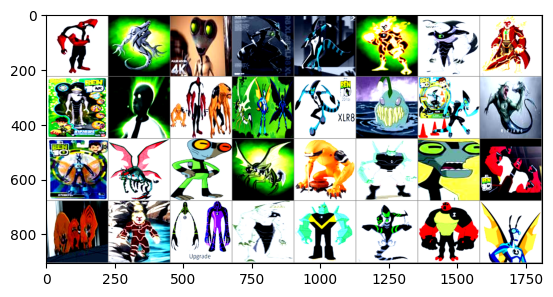

Four Arms Ghostfreak Grey Matter XLR8  XLR8  Heatblast Ripjaws Heatblast Ripjaws Grey Matter Wildmutt Stinkfly XLR8  Ripjaws XLR8  Ripjaws Stinkfly Stinkfly Grey Matter Stinkfly Wildmutt Diamondhead Grey Matter Four Arms Wildmutt Heatblast Upgrade Ripjaws Diamondhead XLR8  Four Arms Stinkfly


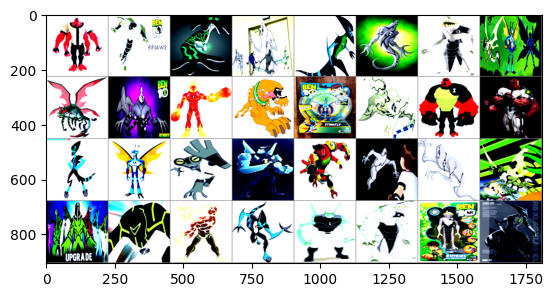

Four Arms Ripjaws Upgrade Ghostfreak XLR8  Ghostfreak Ripjaws Stinkfly Stinkfly Ghostfreak Heatblast Wildmutt Stinkfly Ghostfreak Four Arms Four Arms XLR8  Stinkfly Grey Matter Diamondhead Four Arms Ghostfreak Ghostfreak Stinkfly Upgrade Upgrade Heatblast XLR8  Diamondhead Ripjaws Ripjaws XLR8 


In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision



def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Rastgele görsellerden birini seçerek süreci kontrol edelim
dataiter = iter(train_loader)
images, labels = next(dataiter)


imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{dataset.classes[labels[j]]:5s}' for j in range(batch_size)))

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Tekrar kontrol edelim
dataiter = iter(train_loader)
images, labels = next(dataiter)

#Görselleri gösterelim
imshow(torchvision.utils.make_grid(images))
#Etiketleri yazdıralım
print(' '.join(f'{dataset.classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torchvision.models as models

#Önceden eğitilmiş bir model olan ResNet18'e tensor transferi yaparak kullanalım
model = models.resnet18(pretrained=True)

#10 adet uzaylı türünü tahmin etmeye çalıştığımız için class sayısını 10 yapalım
num_classes = 10
model.fc = nn.Linear(model.fc.in_features, num_classes)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 222MB/s]


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  #Sınıflandırma modelimizi ölçmek için Cross Entropy Loss fonksiyonunu çağıralım
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  #Optimizasyon için SGD Optim'i kullanalım


In [ ]:
num_epochs = 10  #10 kez training loop'u döndürelim

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()  #Gradyanları sıfırlayalım

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Eğitim tamamlandı!")


Eğitim tamamlandı!


In [ ]:
#Model doğrulama
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data in val_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Doğrulama doğruluğu: {100 * correct / total:.2f}%")


Doğrulama doğruluğu: 70.00%
